# Sheet 6

This sheet revolves all around eigenvalues, eigenvectors, and corresponding matrix decompositions.
Let's start with intialization as usual:

In [2]:
import numpy as np                # basic arrays, vectors, matrices
import scipy as sp                # matrix linear algebra 

import matplotlib                 # plotting
import matplotlib.pyplot as plt   # plotting

%matplotlib inline

from IPython.core.display import HTML
HTML("""<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>""");

<div class="alert alert-info">

### Power Iteration to Compute the Largest Eigenpair
</div>

We discussed briefly several methods to compute eigenvalues of a matrix $A$. Among these, the *Power Iteration* is the simplest. However, it is a good illustration of the general idea behind eigenvalue algorithms. It calculates the largest eigenvalue and the corresponding eigenvector in an iterative manner by repeated application of $A$ to a vector $\mathbf{b}$.

<div class="alert alert-success">

**Task**: Complete the function `power_iteration` below to implement the power iteration algorithm to compute the largest eigenpair, given the square matrix `A`. The function should have the following properties:

- It should return the sequence of $\mu_k$ and $\mathbf{b}$, where $\mu_k$ is the Rayleigh coefficient obtained in the $k$-th iteration (This is used for visual verification in the code below the function by plotting the $\mu_k$). The other output $\mathbf{b}$ is the approximation of the eigenvector.
- `power_iteration` should terminate if either the maximum number of iterations (`maxiter`) is reached, or if $(\mu_k,b_k)$ is (numerically) an eigenpair, i.e. $Ab_k$ and $\mu_k b_k$ are close. You may use [`numpy.allclose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) to check this.
</div>

largest eigenvalue = 18.00001493007849 (14 iterations)
corresponding eigenvector =  [0.21764611 0.72547566 0.6529282 ]


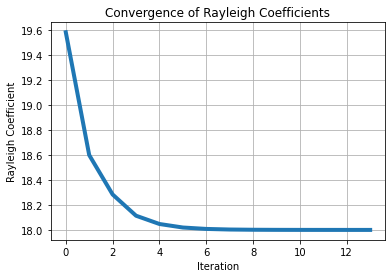

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def power_iteration(A, maxiter=50, tol=1e-6):
    """Perform power iteration on A and return the sequence of Rayleigh coefficients."""
    b = np.random.rand(A.shape[1])
    b = b / np.linalg.norm(b)
    mu = []

    for _ in range(maxiter):
        # Apply the matrix A to the vector b
        b_next = np.dot(A, b)
        
        # Normalize the resulting vector
        b_next = b_next / np.linalg.norm(b_next)
        
        # Compute the Rayleigh quotient (an estimate of the largest eigenvalue)
        mu_k = np.dot(b_next.T, np.dot(A, b_next))
        mu.append(mu_k)
        
        # Check for convergence
        if np.allclose(b, b_next, atol=tol):
            break
        
        # Update vector b
        b = b_next

    return mu, b

# Test power iteration (largest eigenvalue of A = 18)
A = np.array([[9, 0, 3], [4, 6, 12], [15, 9, 3]])

mu, b = power_iteration(A)

print("largest eigenvalue =", mu[-1], "(%d iterations)" % len(mu))
print("corresponding eigenvector = ", b)

# Visualize the convergence of the Rayleigh coefficients
plt.plot(mu, linewidth=4.0)
plt.grid()
plt.title("Convergence of Rayleigh Coefficients")
plt.xlabel("Iteration")
plt.ylabel("Rayleigh Coefficient")
plt.show()




If the algorithm is correct, it should return the maximum eigenvalue of $A$.

Let's inspect convergence by plotting $\Delta_k = |\mu_{k+1} - \mu_k|$, i.e. the order of magnitude of successive updates, in a logarithmic plot.

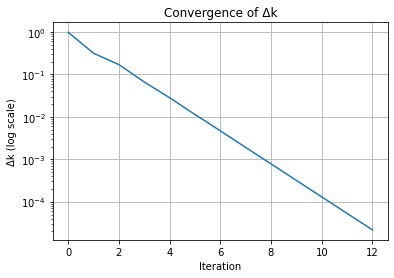

In [6]:
# Inspect convergence by plotting Δ𝑘=|𝜇𝑘+1−𝜇𝑘| in a logarithmic plot
def plot_convergence(ax, mu):
    mu = np.array(mu)  # Convert list to NumPy array for element-wise operations
    delta = np.abs(mu[1:] - mu[:-1])
    ax.plot(delta)
    ax.set_yscale('log')
    ax.grid(True)
    ax.set_title("Convergence of Δk")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Δk (log scale)")

plot_convergence(plt.gca(), mu)
plt.show()

<div class="alert alert-success">

**Task**: visualize and compare the convergence for the following three matrices:

$$A_1 = \mathrm{diag}(10,2,1), \ A_2 = \mathrm{diag}(10,8,1),\ A_3 = \mathrm{diag}(10,9.9,1).$$

What is the explanation for the drastically differing convergence behavior?
</div>

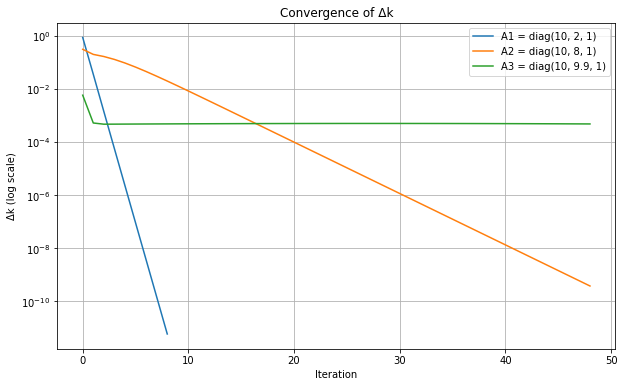

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def power_iteration(A, maxiter=50, tol=1e-6):
    """Perform power iteration on A and return the sequence of Rayleigh coefficients."""
    b = np.random.rand(A.shape[1])
    b = b / np.linalg.norm(b)
    mu = []

    for _ in range(maxiter):
        b_next = np.dot(A, b)
        b_next = b_next / np.linalg.norm(b_next)
        mu_k = np.dot(b_next.T, np.dot(A, b_next))
        mu.append(mu_k)
        if np.allclose(b, b_next, atol=tol):
            break
        b = b_next

    return mu, b

def plot_convergence(ax, mu, label):
    mu = np.array(mu)
    delta = np.abs(mu[1:] - mu[:-1])
    ax.plot(delta, label=label)
    ax.set_yscale('log')
    ax.grid(True)
    ax.set_title("Convergence of Δk")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Δk (log scale)")
    ax.legend()

# Define the three matrices
A1 = np.diag([10, 2, 1])
A2 = np.diag([10, 8, 1])
A3 = np.diag([10, 9.9, 1])

# Perform power iteration on each matrix
mu1, _ = power_iteration(A1)
mu2, _ = power_iteration(A2)
mu3, _ = power_iteration(A3)

# Plot the convergence for each matrix
fig, ax = plt.subplots(figsize=(10, 6))
plot_convergence(ax, mu1, label="A1 = diag(10, 2, 1)")
plot_convergence(ax, mu2, label="A2 = diag(10, 8, 1)")
plot_convergence(ax, mu3, label="A3 = diag(10, 9.9, 1)")

plt.show()


<div class="alert alert-info">

### QR Decomposition using the Householder Transformations
</div>

In the sheet 5, we have seen the QR decomposition of a matrix using the Gram-Schmidt process. In this exercise, the task is to implement it using the more stable Householder transformations. 

<div class="alert alert-success">

**Task**: Complete the function `QR_decomposition_Householder` below to implement the QR decomposition of the given square matrix `A`. The function should simply return the $Q$ and $R$ matrices as outputs. 
</div>

In [10]:
import numpy as np

def householder_reflection(a):
    """Compute the Householder matrix that zeroes out all but the first element of vector a."""
    e = np.zeros_like(a)
    e[0] = np.linalg.norm(a)
    u = a - e
    v = u / np.linalg.norm(u)
    H = np.eye(a.shape[0]) - 2 * np.outer(v, v)
    return H

def QR_decomposition_Householder(A):
    """Perform QR decomposition of matrix A using Householder transformations."""
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    
    for i in range(n):
        # Extract the vector to reflect
        x = R[i:, i]
        
        # Compute the Householder reflection matrix
        H = np.eye(m)
        H[i:, i:] = householder_reflection(x)
        
        # Apply the Householder transformation to R and Q
        R = H @ R
        Q = Q @ H.T
    
    return Q, R

# Test the implementation
A = np.random.rand(4, 4)
Q, R = QR_decomposition_Householder(A)

# Check if A = QR
Acheck = Q @ R
print("A - QR =\n", A - Acheck)

# Check if Q is orthogonal, i.e., Q^T Q = I
Icheck = np.transpose(Q) @ Q
print("Q^T Q =\n", Icheck)


A - QR =
 [[-5.55111512e-17 -1.11022302e-16 -2.22044605e-16  1.11022302e-16]
 [ 6.93889390e-18  1.11022302e-16 -5.55111512e-17 -3.05311332e-16]
 [-1.11022302e-16  0.00000000e+00 -1.11022302e-16 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00 -5.55111512e-17  2.22044605e-16]]
Q^T Q =
 [[ 1.00000000e+00 -1.38777878e-17  1.11022302e-16  2.77555756e-17]
 [-1.38777878e-17  1.00000000e+00  5.55111512e-17 -5.55111512e-17]
 [ 1.11022302e-16  5.55111512e-17  1.00000000e+00  1.24900090e-16]
 [ 2.77555756e-17 -5.55111512e-17  1.24900090e-16  1.00000000e+00]]


We also check the correctness of the implementation on a test matrix using the identities $A = QR$ and $Q^\top Q = I$

<div class="alert alert-info">

### Computing Eigenvalues using the QR Algorithm
</div>

<div class="alert alert-success">

**Task**: Complete the function `compute_eigenvalues`, which computes the eigenvalues of the square matrix $A$ using the QR algorithm. The function should return the vector of eigenvalues as the output. 
</div>

In [12]:
import numpy as np

def compute_eigenvalues(A, maxiter=1000, tol=1e-10):
    """Compute the eigenvalues of matrix A using the QR algorithm."""
    A_k = A.copy()
    n = A.shape[0]
    
    for _ in range(maxiter):
        # Perform QR decomposition
        Q, R = np.linalg.qr(A_k)
        # Form the next matrix A_k+1
        A_k = R @ Q
        
        # Check for convergence by examining the off-diagonal elements
        off_diagonal = np.sqrt(np.sum(np.tril(A_k, -1)**2))
        if off_diagonal < tol:
            break
    
    # The eigenvalues are the diagonal elements of the resulting matrix
    eigvals = np.diag(A_k)
    return eigvals

# Test the implementation
N = 6
Lambda = np.diag(np.random.rand(N) * 10)
S = np.random.random((N, N))
Sinv = np.linalg.inv(S)
A = S @ Lambda @ Sinv

# Compute eigenvalues using the QR algorithm
eigenvaluesOfA = compute_eigenvalues(A)

# Compare with NumPy's built-in function
eigenvaluesOfA_numpy = np.linalg.eigvals(A)

print("Eigenvalues computed by QR algorithm:", eigenvaluesOfA)
print("Eigenvalues computed by numpy.linalg.eigvals:", eigenvaluesOfA_numpy)


Eigenvalues computed by QR algorithm: [9.14813936 8.10363142 7.26908935 5.53000632 3.19010167 0.55246726]
Eigenvalues computed by numpy.linalg.eigvals: [0.55246726 3.19010167 5.53000632 9.14813936 7.26908935 8.10363142]


We check the implementation on a random matrix $A$, which has real eigenvalues. We can easily generate such a matrix using the diagonalization
\begin{equation}
A = S \Lambda S^{-1}
\end{equation}
We first generate a diagonal matrix 

Now we generate a square random $S$ matrix. Note that this matrix will be invertible with almost certain probability. Using $S$ and $\Lambda$, we can generate a random matrix with real eigenvalues to test the implementation

The eigenvalues of $A$ can be easily found by using the `numpy.linalg.eigvals` function:

Now we are ready to use 'compute_eigenvalues'. If the implementation is correct, it should return exactly the same values as above